In [61]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
books=pd.read_csv("hathi_ia_texts.csv")

In [39]:
import re

In [52]:
def clean(s):
    s=s.split(";")[0]
    s=re.sub('[^a-zA-Z ]+', '', s) #keep only alphabetical characters
    s=s.lower()
    
    s=s[:50]
    return s
    

In [90]:
books["title"]=books["title"].apply(clean)

In [92]:
books

,Unnamed: 0,htid,pub_place,title,author,rights_date_used,text
0,0,coo1.ark:/13960/t2m623920,enk,the elements of elocution with special referen...,"Clegg, Charles E.",1890,rgdetailscuthe elements of elocution with spec...
1,1,coo1.ark:/13960/t58d0gk82,xx,the american star speaker and model elocutionist,"Brown, Charles Walter, 1866-1934.",1902,d physical culture elocution aiid delsarte bas...
2,2,coo1.ark:/13960/t6nz8rs9s,nyu,the delsarte system of physical culture,"Georgen, Eleanor.",1893,t by the butterick publishing company limitedm...
3,3,hvd.32044014467336,nyu,the art of oratory system of delsarte from the...,"Delaumosne, Abb'e.",1884,iladelphiacsl echool of elooution and olatoryt...
4,4,hvd.32044079736146,mau,lectures and practical lessons in the three de...,"Zachos, J. C. 1820-1898.",1870,meadville penn asnonresident professorbyfoohn ...
...,...,...,...,...,...,...,...
136,92,cu31924031387602,NaN,the science of elocution,"Hamill, S. S",1872,he united states on the use of the text httpww...
139,95,cu31924031663002,NaN,elocution the sources and elements of its powe...,"McIlvaine, J. H. (Joshua Hall), 1815-1897",1871,own copyright restrictions in the united state...
140,97,cu31924031749827,NaN,kings college lectures on elocution,"Plumptre, Charles John, 1818-1887",1881,nited states on the use of the text httpwwwarc...
141,98,cu31924031784832,NaN,essays and postscripts on elocution,"Bell, Alexander Melville, 1819-1905",1886,re no known copyright restrictions in the unit...


In [94]:
books=books.drop_duplicates(["title"])

In [95]:
books=books.dropna(subset=["text"])

In [96]:
books

,Unnamed: 0,htid,pub_place,title,author,rights_date_used,text
0,0,coo1.ark:/13960/t2m623920,enk,the elements of elocution with special referen...,"Clegg, Charles E.",1890,rgdetailscuthe elements of elocution with spec...
1,1,coo1.ark:/13960/t58d0gk82,xx,the american star speaker and model elocutionist,"Brown, Charles Walter, 1866-1934.",1902,d physical culture elocution aiid delsarte bas...
2,2,coo1.ark:/13960/t6nz8rs9s,nyu,the delsarte system of physical culture,"Georgen, Eleanor.",1893,t by the butterick publishing company limitedm...
3,3,hvd.32044014467336,nyu,the art of oratory system of delsarte from the...,"Delaumosne, Abb'e.",1884,iladelphiacsl echool of elooution and olatoryt...
4,4,hvd.32044079736146,mau,lectures and practical lessons in the three de...,"Zachos, J. C. 1820-1898.",1870,meadville penn asnonresident professorbyfoohn ...
...,...,...,...,...,...,...,...
136,92,cu31924031387602,NaN,the science of elocution,"Hamill, S. S",1872,he united states on the use of the text httpww...
139,95,cu31924031663002,NaN,elocution the sources and elements of its powe...,"McIlvaine, J. H. (Joshua Hall), 1815-1897",1871,own copyright restrictions in the united state...
140,97,cu31924031749827,NaN,kings college lectures on elocution,"Plumptre, Charles John, 1818-1887",1881,nited states on the use of the text httpwwwarc...
141,98,cu31924031784832,NaN,essays and postscripts on elocution,"Bell, Alexander Melville, 1819-1905",1886,re no known copyright restrictions in the unit...


In [62]:
text = books['text']
model = CountVectorizer(ngram_range = (5, 5))
matrix = model.fit_transform(text).toarray()
df_output = pd.DataFrame(data = matrix, columns = model.get_feature_names_out())
df_output.T.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
zzzazim rfl pg xt spirus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zzzi fi through their months,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zzziv by nebos lonely mountain,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zzzzi swell as agent ardent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zzzzzz monster of iron steel,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df_output["title"]=books["title"]
df_output=df_output.set_index("title")
df_output=df_output.T

In [64]:
def floor(num):
    if num>0:
        return 1
    else:
        return 0

In [65]:
df_output=df_output.applymap(floor)

In [66]:
df_output["sum"]=df_output.sum(axis=1)

In [67]:
df_output=df_output[df_output["sum"]>5].sort_values("sum", ascending=False)

In [116]:
df_output=df_output.T

In [118]:
df_output["books"]=list(books["title"]).append("sum")
df_output=df_output.set_index("books").T

In [119]:
df_output.to_csv("all_counts.csv")

In [4]:
reuse=pd.read_csv("all_count_matrix.csv")

In [103]:
reuse=df_output

In [330]:
top=reuse.head(20000)

In [331]:
top = top.iloc[:,:-1]

In [332]:
top=top.T

In [333]:
top["books"]=list(books["title"])

In [334]:
top=top.set_index("books").T

In [335]:
top=top.drop(columns=["books"])

KeyError: "['books'] not found in axis"

In [336]:
list(top.index)

['and at the same time',
 'at the end of the',
 'is one of the most',
 'on the part of the',
 'in the middle of the',
 'the action to the word',
 'at the close of the',
 'suit the action to the',
 'of the organs of speech',
 'the very torrent tempest and',
 'the word to the action',
 'nobler in the mind to',
 'the weight of the body',
 'at the head of the',
 'the speech pray you as',
 'the tones of the voice',
 'the upper part of the',
 'to the word the word',
 'at the same time the',
 'not the modesty of nature',
 'that the dread of something',
 'in the very torrent tempest',
 'it is not to be',
 'very torrent tempest and as',
 'action to the word the',
 'sleep of death what dreams',
 'that sleep of death what',
 'of death what dreams may',
 'in that sleep of death',
 'for in the very torrent',
 'take arms against sea of',
 'the green graves of your',
 'in the midst of the',
 'the word the word to',
 'torrent tempest and as may',
 'thou deep and dark blue',
 'tis nobler in the mind',


In [340]:
top = top.astype(int).T

In [341]:
top=top.head(1000)

In [342]:
top

books,the elements of elocution with special reference t,the american star speaker and model elocutionist,the delsarte system of physical culture,the art of oratory system of delsarte from the fre,lectures and practical lessons in the three depart,elements of rhetoric comprising the substance of,reading and elocution theoretical and practical,a practical manual of elocution embracing voice a,the art of elocution from the simple articulation,the art of elocution,...,a ten weeks course in elocution,the science and art of elocution or how to read a,the science and art of elocution embracing a compr,elocution voice and gesture,elocution for advanced pupils,the science of elocution,elocution the sources and elements of its power a,kings college lectures on elocution,essays and postscripts on elocution,elocution and the dramatic art
and at the same time,1,0,1,1,0,1,0,1,1,1,...,0,0,0,0,1,1,1,1,1,1
at the end of the,1,1,1,0,0,0,0,1,0,0,...,1,0,0,1,0,1,1,1,1,0
is one of the most,0,1,1,1,0,0,0,1,1,1,...,1,0,0,1,0,1,1,1,1,1
on the part of the,0,1,1,0,0,0,0,1,0,0,...,0,1,1,1,1,1,1,1,0,0
in the middle of the,0,1,0,0,0,0,0,1,1,1,...,1,1,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
it come back to me,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
ambitious when that the poor,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
and your fires strike for,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,1,0,0,0,0
so light to the saddle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [346]:
top=top.T

In [347]:
coocc = top.T.dot(top)

In [348]:
import seaborn as sns

In [349]:
coocc

,and at the same time,at the end of the,is one of the most,on the part of the,in the middle of the,the action to the word,at the close of the,suit the action to the,of the organs of speech,the very torrent tempest and,...,use of that which is,thy depths with bubbling groan,who is here so base,by turns they felt the,clouds and darkness rest upon,it come back to me,ambitious when that the poor,and your fires strike for,so light to the saddle,is the question whether tis
and at the same time,66,42,45,36,31,29,39,29,32,30,...,16,18,21,19,19,19,20,18,20,13
at the end of the,42,65,43,37,31,26,33,25,29,19,...,15,16,15,14,13,16,14,14,20,14
is one of the most,45,43,63,34,32,30,29,29,31,25,...,15,16,17,10,19,15,16,13,16,16
on the part of the,36,37,34,56,22,23,29,22,22,18,...,12,11,14,11,8,12,11,12,15,15
in the middle of the,31,31,32,22,49,19,21,19,19,20,...,12,11,10,11,14,9,9,13,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
it come back to me,19,16,15,12,9,16,12,16,9,17,...,12,10,12,9,9,24,17,5,9,9
ambitious when that the poor,20,14,16,11,9,13,12,13,8,15,...,10,8,16,11,9,17,24,5,11,7
and your fires strike for,18,14,13,12,13,16,11,16,14,16,...,2,13,10,11,10,5,5,24,8,6
so light to the saddle,20,20,16,15,9,13,12,13,11,11,...,9,10,11,10,9,9,11,8,24,9


In [350]:
import numpy as np

In [376]:
labels = clust
lut = dict(zip(set(labels), sns.color_palette("Paired", 15)))
row_colors = pd.DataFrame(labels)[0].map(lut)

C:\Users\lucia\miniconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


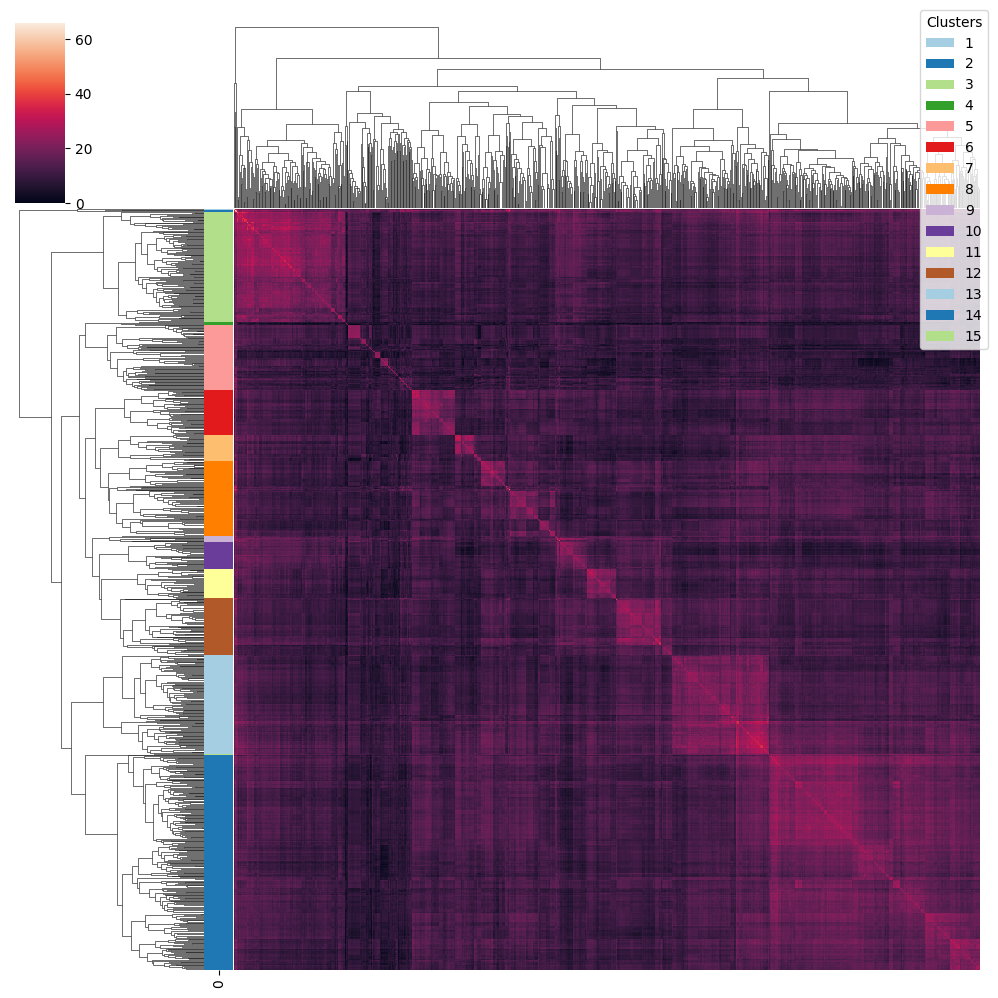

In [377]:
clustermap=sns.clustermap(coocc.reset_index(drop=True),yticklabels=False, xticklabels=False, row_colors=row_colors)
handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title='Clusters',
           bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')


In [239]:
labels = clustermap.ax_heatmap.yaxis.get_majorticklabels()


In [240]:
labels

[Text(1, 0.5, 'at the end of the'),
 Text(1, 1.5, 'on the part of the'),
 Text(1, 2.5, 'and at the same time'),
 Text(1, 3.5, 'is one of the most'),
 Text(1, 4.5, 'oerstep not the modesty of'),
 Text(1, 5.5, 'you oerstep not the modesty'),
 Text(1, 6.5, 'that you oerstep not the'),
 Text(1, 7.5, 'whirlwind of your passion you'),
 Text(1, 8.5, 'your passion you must acquire'),
 Text(1, 9.5, 'and body of the time'),
 Text(1, 10.5, 'not too tame neither but'),
 Text(1, 11.5, 'too tame neither but let'),
 Text(1, 12.5, 'this overdone or come tardy'),
 Text(1, 13.5, 'is from the purpose of'),
 Text(1, 14.5, 'feature scorn her own image'),
 Text(1, 15.5, 'so overdone is from the'),
 Text(1, 16.5, 'up to nature to show'),
 Text(1, 17.5, 'mirror up to nature to'),
 Text(1, 18.5, 'there be players that have'),
 Text(1, 19.5, 'the ears of the groundlings'),
 Text(1, 20.5, 'it offends me to the'),
 Text(1, 21.5, 'as pronounced it to you'),
 Text(1, 22.5, 'pray you as pronounced it'),
 Text(1, 23.

In [245]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

In [246]:
Z = linkage(coocc, 'average')

In [247]:
Z

array([[100.        , 104.        ,   0.        ,   2.        ],
       [328.        , 378.        ,   0.        ,   2.        ],
       [233.        , 261.        ,   0.        ,   2.        ],
       ...,
       [972.        , 995.        , 153.45724975, 369.        ],
       [991.        , 996.        , 156.08568136, 496.        ],
       [994.        , 997.        , 170.53638157, 500.        ]])

In [248]:

from scipy.spatial import distance
from scipy.cluster import hierarchy

In [249]:
row_linkage = hierarchy.linkage(
    distance.pdist(coocc), method='average')

In [255]:
row_linkage

array([[100.        , 104.        ,   0.        ,   2.        ],
       [328.        , 378.        ,   0.        ,   2.        ],
       [233.        , 261.        ,   0.        ,   2.        ],
       ...,
       [972.        , 995.        , 153.45724975, 369.        ],
       [991.        , 996.        , 156.08568136, 496.        ],
       [994.        , 997.        , 170.53638157, 500.        ]])

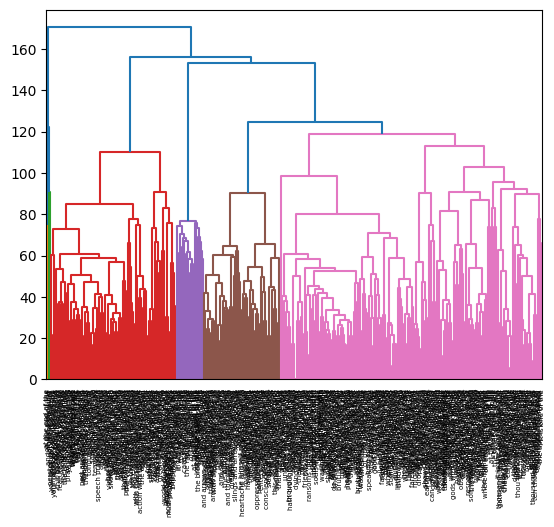

In [260]:
dn=dendrogram(row_linkage, labels=coocc.index)

In [355]:
from scipy.cluster.hierarchy import fcluster


In [356]:
Z = linkage(coocc, 'average')

In [370]:
clust=fcluster(Z, 11, criterion='maxclust')


In [394]:
top=top.T

In [392]:
coocc

,and at the same time,at the end of the,is one of the most,on the part of the,in the middle of the,the action to the word,at the close of the,suit the action to the,of the organs of speech,the very torrent tempest and,...,use of that which is,thy depths with bubbling groan,who is here so base,by turns they felt the,clouds and darkness rest upon,it come back to me,ambitious when that the poor,and your fires strike for,so light to the saddle,is the question whether tis
and at the same time,66,42,45,36,31,29,39,29,32,30,...,16,18,21,19,19,19,20,18,20,13
at the end of the,42,65,43,37,31,26,33,25,29,19,...,15,16,15,14,13,16,14,14,20,14
is one of the most,45,43,63,34,32,30,29,29,31,25,...,15,16,17,10,19,15,16,13,16,16
on the part of the,36,37,34,56,22,23,29,22,22,18,...,12,11,14,11,8,12,11,12,15,15
in the middle of the,31,31,32,22,49,19,21,19,19,20,...,12,11,10,11,14,9,9,13,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
it come back to me,19,16,15,12,9,16,12,16,9,17,...,12,10,12,9,9,24,17,5,9,9
ambitious when that the poor,20,14,16,11,9,13,12,13,8,15,...,10,8,16,11,9,17,24,5,11,7
and your fires strike for,18,14,13,12,13,16,11,16,14,16,...,2,13,10,11,10,5,5,24,8,6
so light to the saddle,20,20,16,15,9,13,12,13,11,11,...,9,10,11,10,9,9,11,8,24,9


In [397]:
cluster=[]

for c in clust:
    if c==3:
        cluster.append("Hamlet A3 S2")
    elif c==13:
        cluster.append("Hamlet A3 S1")
    elif c==14:
        cluster.append("Julius Caesar")
    elif c==12:
        cluster.append("Byron Childe Harold")
    elif c==11:
        cluster.append("Byron Eve of Waterloo")
    elif c==10:
        cluster.append("Marco Bozzaris")
    elif c==6:
        cluster.append("William Collins Passions")
        
    else:
        cluster.append(c)

In [398]:
top["cluster"]=cluster

In [399]:
top

books,the elements of elocution with special reference t,the american star speaker and model elocutionist,the delsarte system of physical culture,the art of oratory system of delsarte from the fre,lectures and practical lessons in the three depart,elements of rhetoric comprising the substance of,reading and elocution theoretical and practical,a practical manual of elocution embracing voice a,the art of elocution from the simple articulation,the art of elocution,...,the science and art of elocution or how to read a,the science and art of elocution embracing a compr,elocution voice and gesture,elocution for advanced pupils,the science of elocution,elocution the sources and elements of its power a,kings college lectures on elocution,essays and postscripts on elocution,elocution and the dramatic art,cluster
and at the same time,1,0,1,1,0,1,0,1,1,1,...,0,0,0,1,1,1,1,1,1,2
at the end of the,1,1,1,0,0,0,0,1,0,0,...,0,0,1,0,1,1,1,1,0,1
is one of the most,0,1,1,1,0,0,0,1,1,1,...,0,0,1,0,1,1,1,1,1,2
on the part of the,0,1,1,0,0,0,0,1,0,0,...,1,1,1,1,1,1,1,0,0,1
in the middle of the,0,1,0,0,0,0,0,1,1,1,...,1,1,0,0,0,1,1,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
it come back to me,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,Julius Caesar
ambitious when that the poor,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Julius Caesar
and your fires strike for,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,Marco Bozzaris
so light to the saddle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,8


In [395]:
clu3=np.where(clust == 8)[0]

In [396]:
list(coocc.iloc[clu3].index)

['in the middle of the',
 'at the close of the',
 'the tones of the voice',
 'the upper part of the',
 'at the same time the',
 'it is not to be',
 'to the end of the',
 'this secret dread and inward',
 'whence this secret dread and',
 'there is all nature cries',
 'it will be observed that',
 'that there is all nature',
 'ready gods with all your',
 'dim with age and nature',
 'at the end of sentence',
 'that which he delights in',
 'observe you must stand and',
 'age and nature sink in',
 'he delights in must be',
 'have done that you should',
 'the drawn dagger and defies',
 'and antidote are both before',
 'with age and nature sink',
 'the divinity that stirs within',
 'the face of the earth',
 'drawn dagger and defies its',
 'bane and antidote are both',
 'be ready gods with all',
 'or whence this secret dread',
 'be dog and bay the',
 'done that you should be',
 'gods with all your thunderbolts',
 'which he delights in must',
 'in moment brings me to',
 'shall digest the venom of